<a href="https://colab.research.google.com/github/Rohantimoney/Coderspree3.0/blob/master/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rohan Beri, 2200290130138, IT-C, 3rd Year


In [112]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [113]:
#loading data set
hd_df = pd.read_csv('/content/heart_disease_uci.csv')

In [114]:
#checking rows  and cols
hd_df.shape

(920, 16)

In [115]:
#Checking information
hd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [116]:
hd_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [117]:
hd_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [118]:
#checking missing values
hd_df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [119]:
hd_df.duplicated().sum()

np.int64(0)

In [120]:
#Handling null values
for col in hd_df.columns:
    if hd_df[col].isnull().any():
        if hd_df[col].dtype == 'object':
            hd_df[col].fillna(hd_df[col].mode()[0], inplace=True)
        else:
            hd_df[col].fillna(hd_df[col].mean(), inplace=True)

<ipython-input-120-51301b42cf1f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hd_df[col].fillna(hd_df[col].mean(), inplace=True)
<ipython-input-120-51301b42cf1f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [121]:
hd_df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [122]:
#Handling duplicated values
hd_df.drop_duplicates(inplace=True)

# Data Distribution Displot

<ipython-input-123-2241bad83f8f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hd_df[col], kde=True)
<ipython-input-123-2241bad83f8f>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hd_df[col], kde=True)
<ipython-input-123-2241bad83f8f>:11: UserWarning: 

`distplot` is a deprecated functio

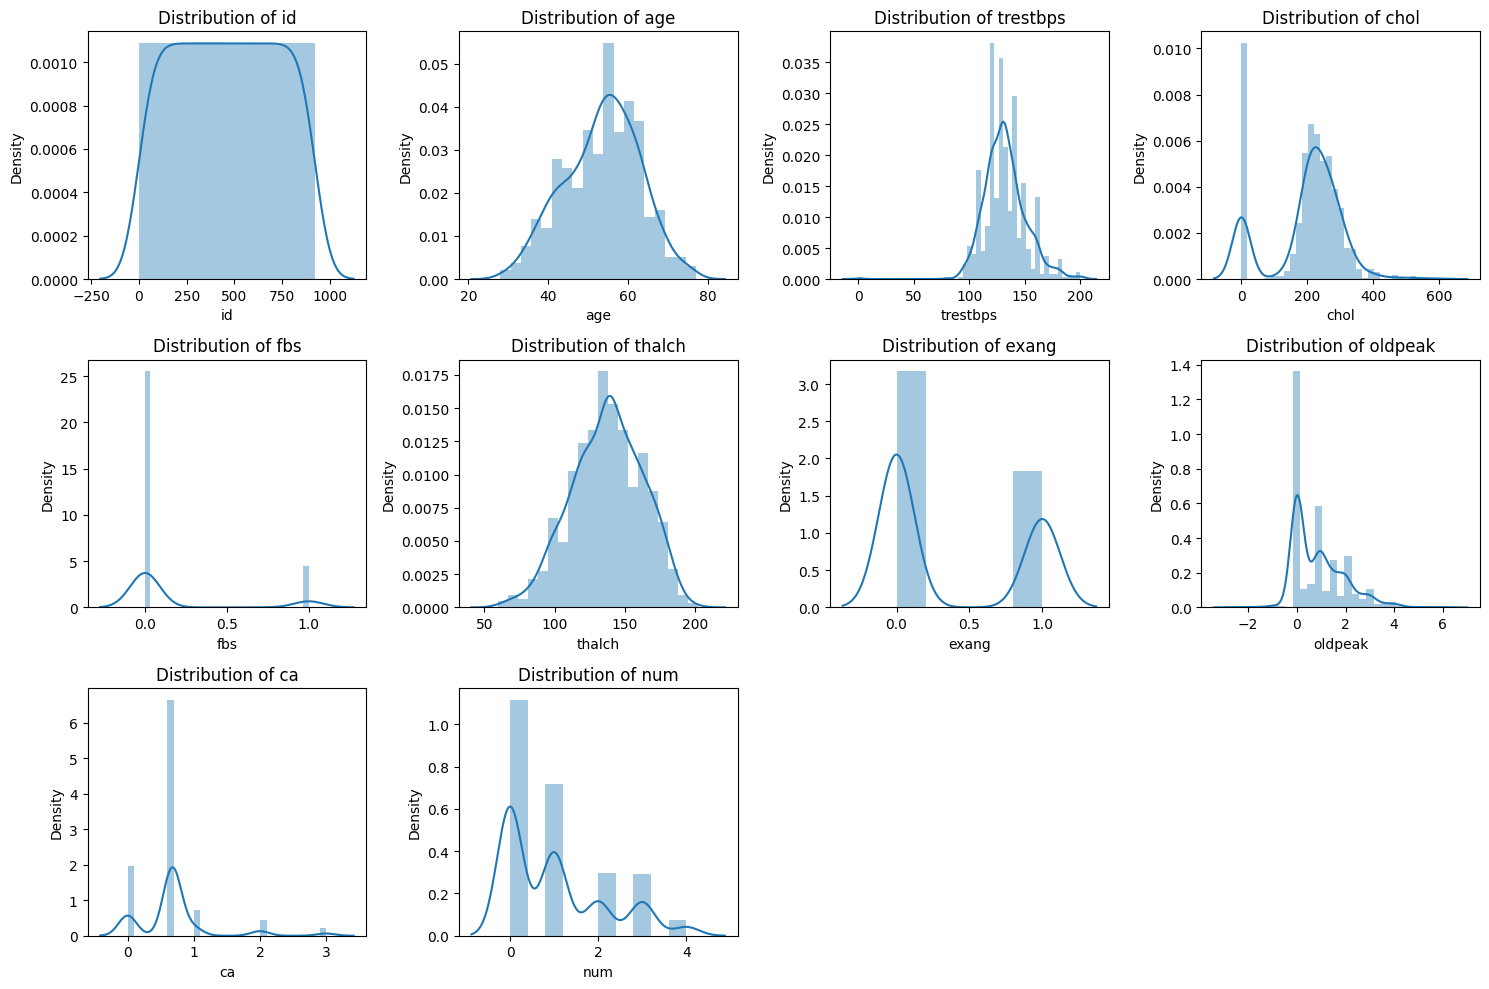

In [123]:
plt.figure(figsize=(15, 10))
subplot_index = 1
rows = 3
cols = 4
num_subplots = rows * cols

for i, col in enumerate(hd_df.columns):
    if pd.api.types.is_numeric_dtype(hd_df[col]):
        if subplot_index <= num_subplots:
            plt.subplot(rows, cols, subplot_index)
            sns.distplot(hd_df[col], kde=True)
            plt.title(f'Distribution of {col}')
            subplot_index += 1
        else:
            break

plt.tight_layout()
plt.show()

Outlier Detection using Boxplot

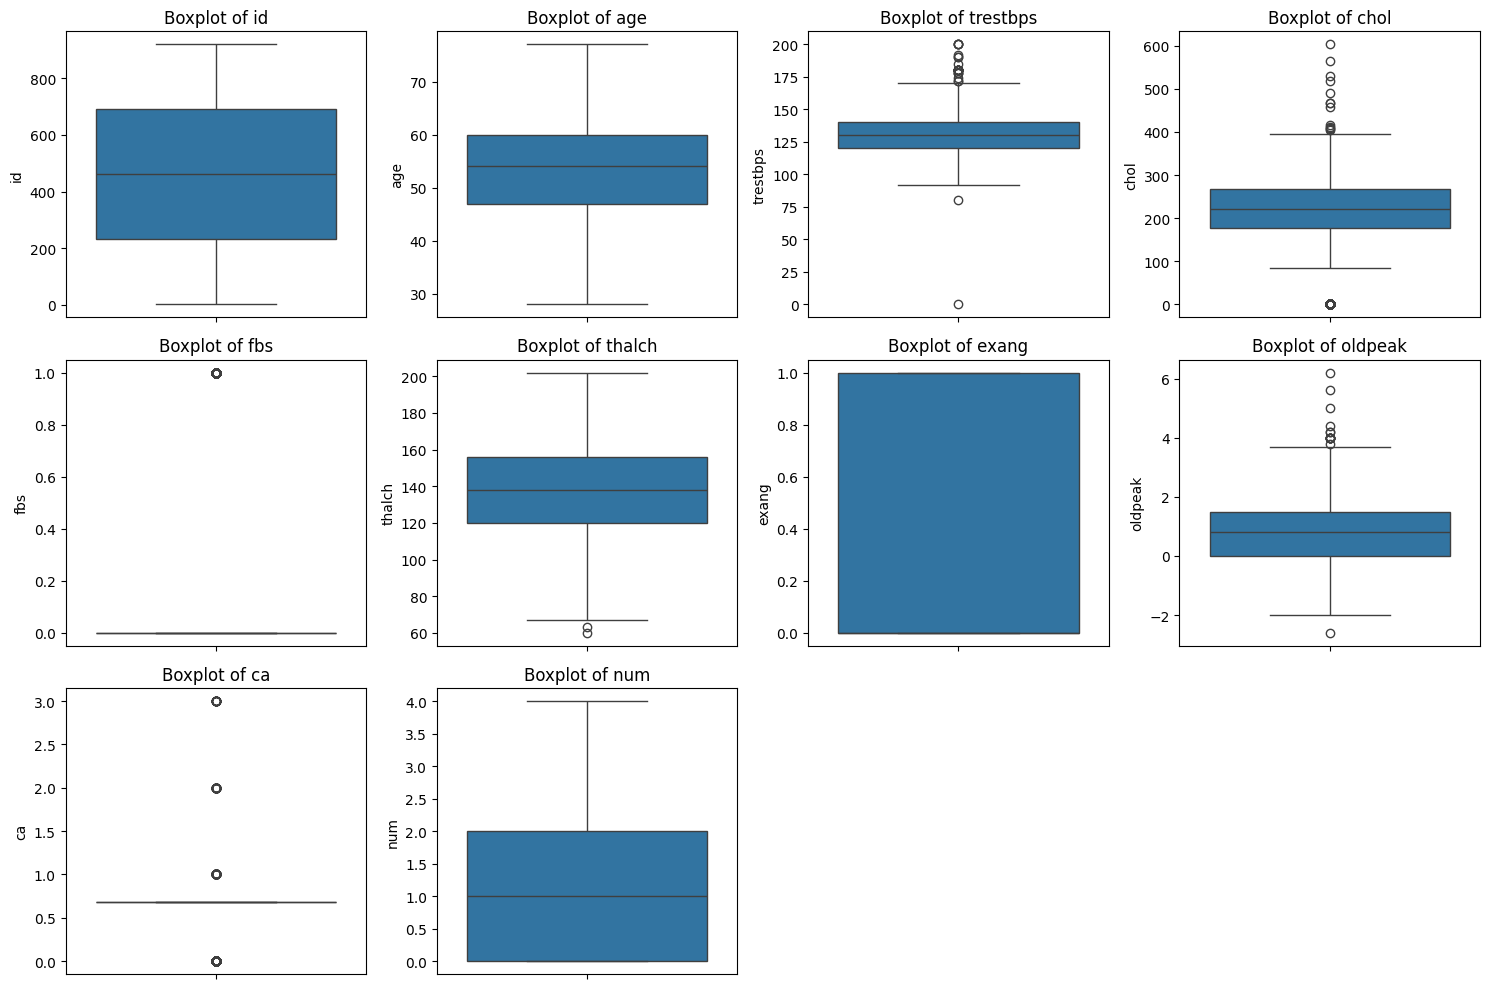

In [124]:
plt.figure(figsize=(15, 10))
subplot_index = 1
for i, col in enumerate(hd_df.columns):
    if hd_df[col].dtype != 'object':
        if subplot_index <= 12:
            plt.subplot(3, 4, subplot_index)
            sns.boxplot(y=hd_df[col])
            plt.title(f'Boxplot of {col}')
            subplot_index += 1
        else:
            break  # Stop plotting after 12 subplots
plt.tight_layout()
plt.show()

Handling of outliers

In [125]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Feature correlation using pairplot

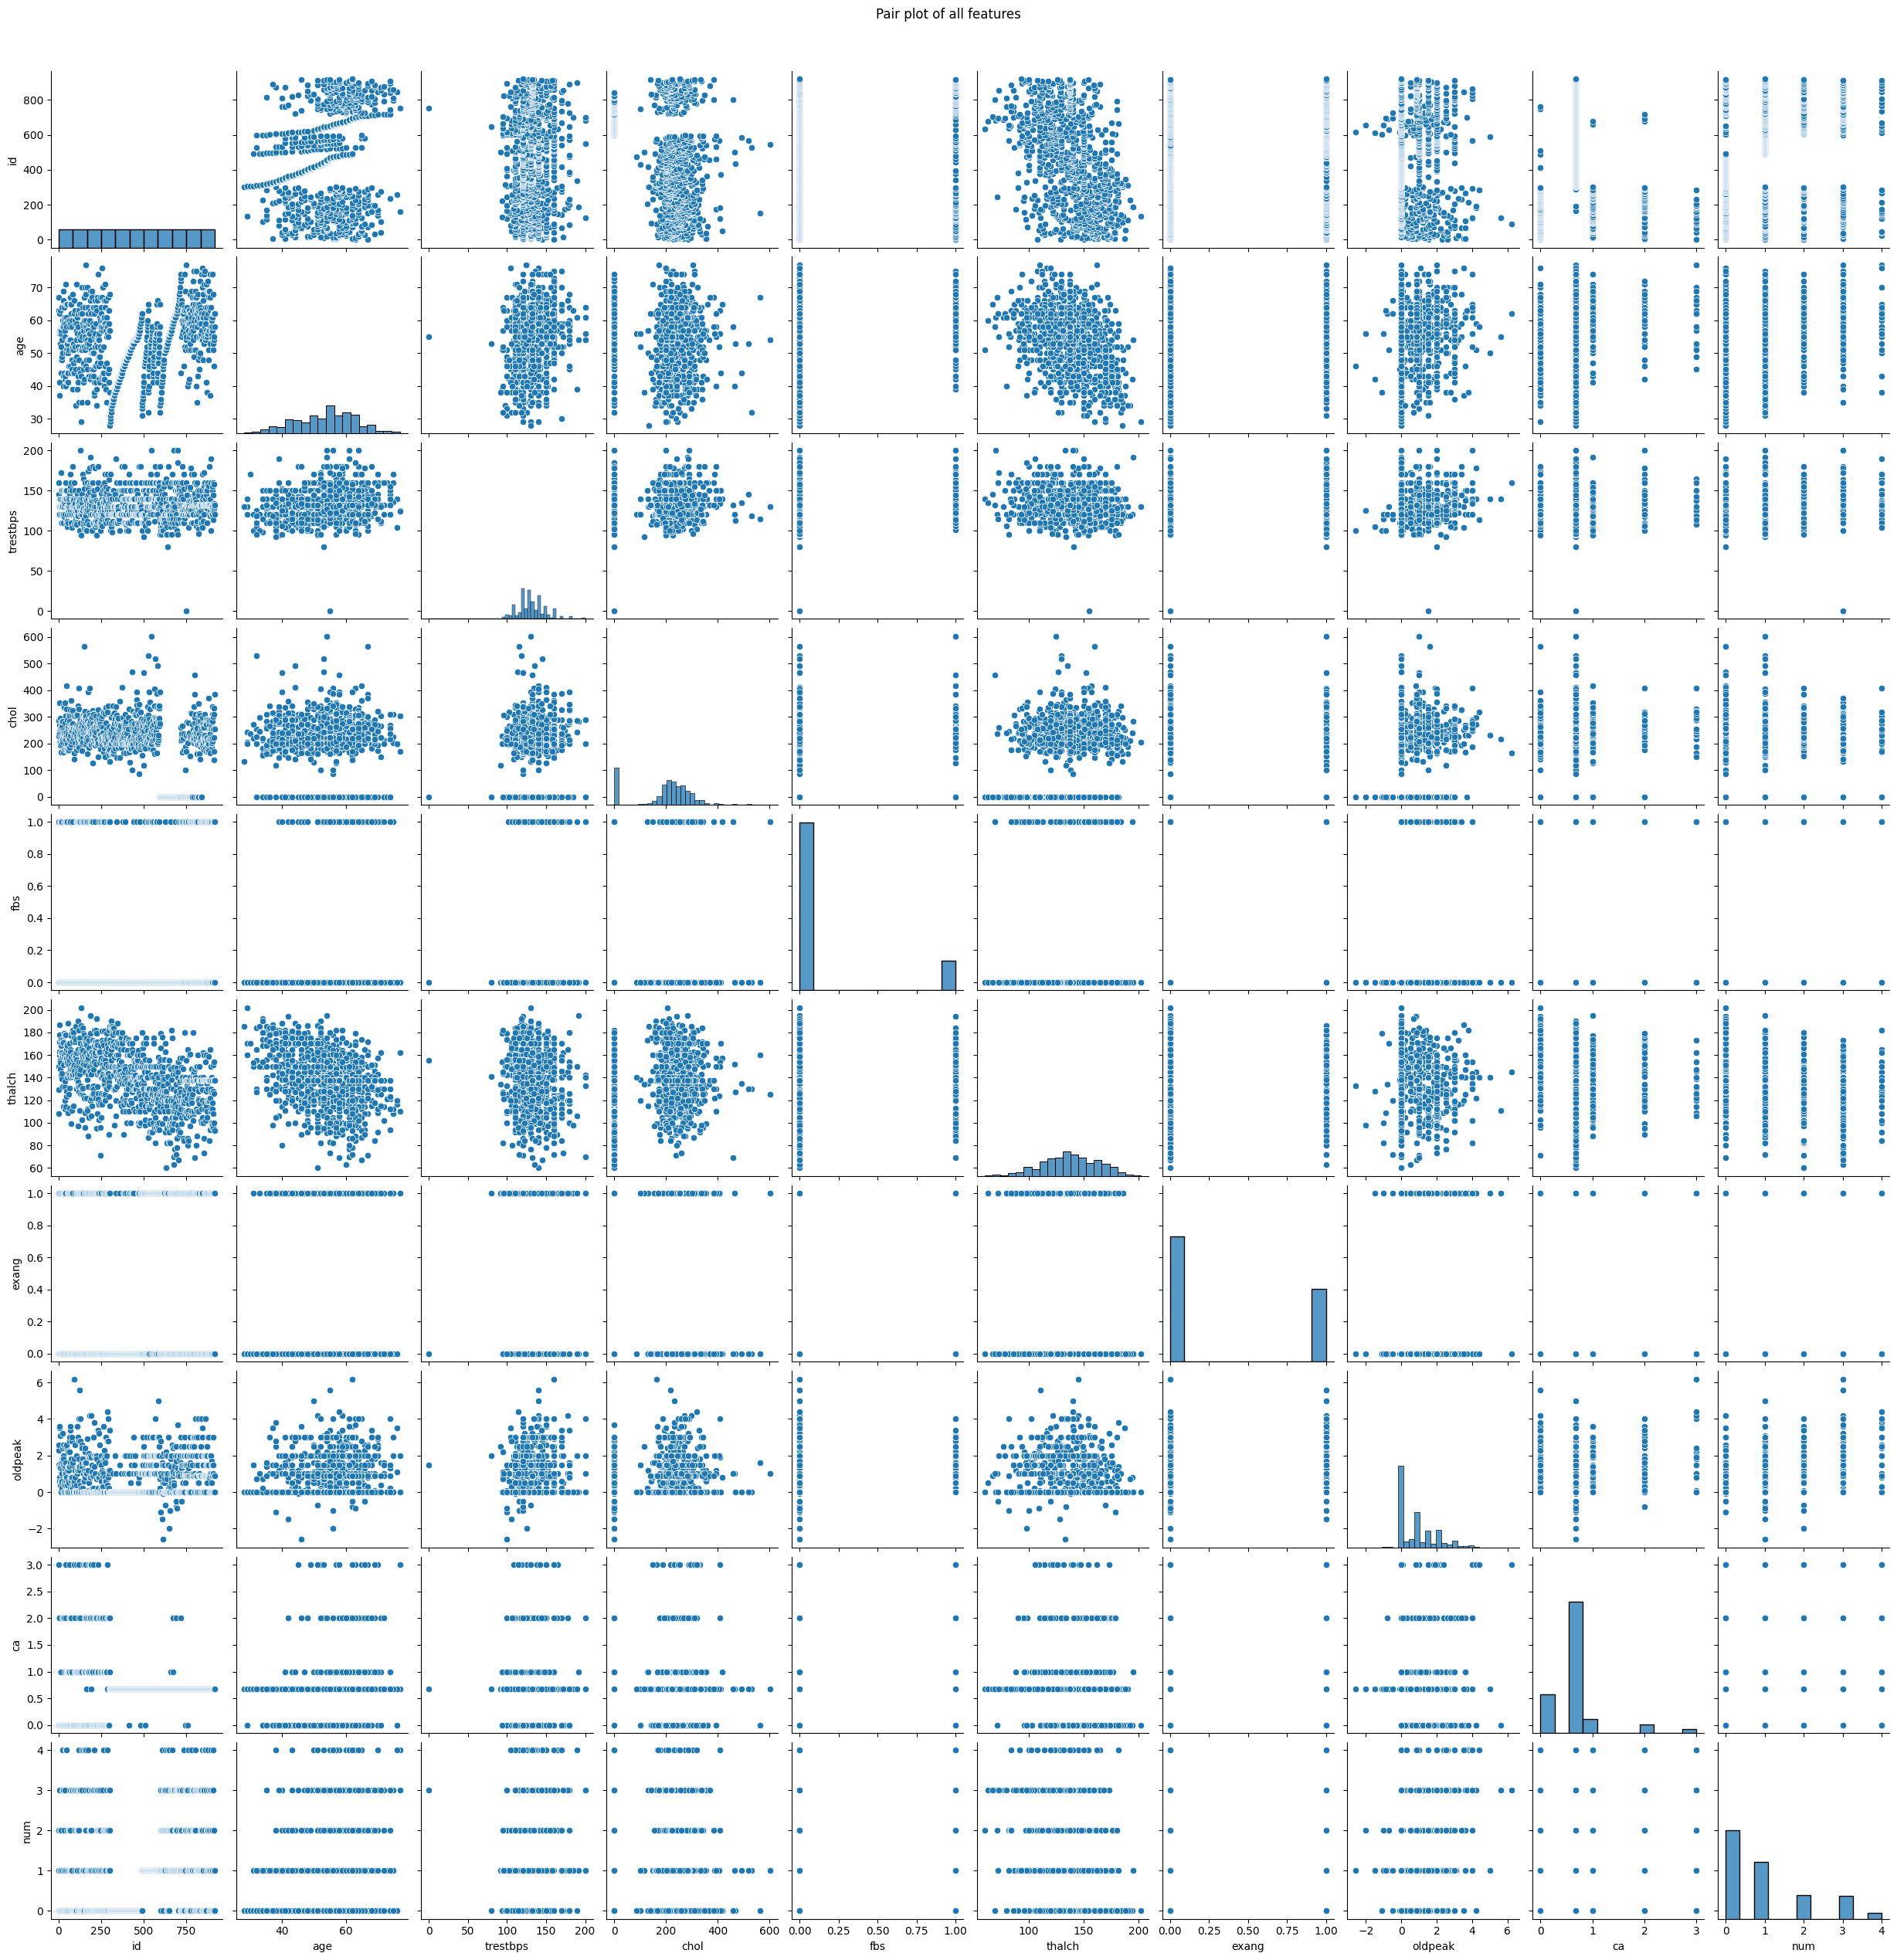

In [126]:
sns.pairplot(hd_df)
plt.suptitle("Pair plot of all features", y=1.02)
plt.show()

Categorical Columns: ['sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']
Label Encoded: sex
One-Hot Encoded: dataset
One-Hot Encoded: cp
One-Hot Encoded: restecg
One-Hot Encoded: slope
One-Hot Encoded: thal


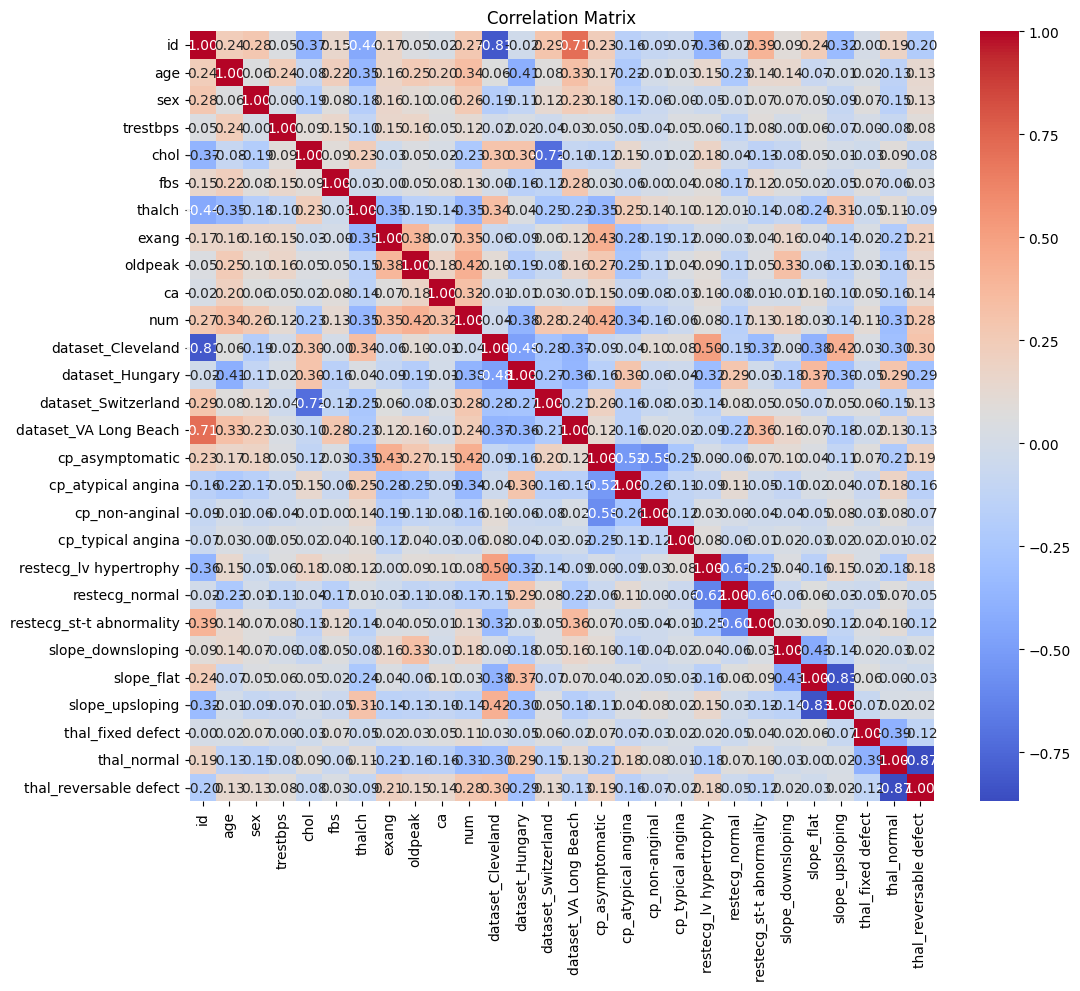

In [127]:
#correlation matrix using heat map
categorical_cols = [col for col in hd_df.columns if hd_df[col].dtype == 'object']
print("Categorical Columns:", categorical_cols)

# Encode categorical columns
if categorical_cols:
    # Example using Label Encoding for binary categorical features
    label_encoders = {}
    for col in categorical_cols:
        if hd_df[col].nunique() <= 2:  # Check if it's binary
            label_encoders[col] = LabelEncoder()
            hd_df[col] = label_encoders[col].fit_transform(hd_df[col])
            print(f"Label Encoded: {col}")
        else:
            # Example using One-Hot Encoding for multi-category nominal features
            encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
            encoded_data = encoder.fit_transform(hd_df[[col]])
            encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out([col]))
            hd_df = pd.concat([hd_df.drop(col, axis=1).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
            print(f"One-Hot Encoded: {col}")

# Now calculate the correlation matrix
correlation_matrix = hd_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# DATA PROCESSING

In [128]:
#identifying the target variable
target_column = 'oldpeak'
if target_column not in hd_df.columns:
    print(f"Error: Target column '{target_column}' not found. Please check the name.")
    exit()

In [129]:
# Separate features (X) and target (y)
X = hd_df.drop(target_column, axis=1)
y = hd_df[target_column]

In [130]:
# Identify categorical and numerical features
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype != 'object']

In [131]:
# Encode categorical features
if categorical_features:
    # Example using One-Hot Encoding (more common for nominal categories)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    X_encoded = encoder.fit_transform(X[categorical_features])
    X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
    X = pd.concat([X.drop(categorical_features, axis=1).reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
    print("\nFeatures after One-Hot Encoding:")
    print(X.head())
else:
    print("\nNo categorical features to encode.")


No categorical features to encode.


In [132]:
# Scale numerical features
if numerical_features:
    scaler = MinMaxScaler()
    X[numerical_features] = scaler.fit_transform(X[numerical_features])
    print("\nScaled Numerical Features:")
    print(X[numerical_features].head())
else:
    print("\nNo numerical features to scale.")

print("\nFinal Feature Variables (X):")
print(X.head())
print("\nTarget Variable (y):")
print(y.head())


Scaled Numerical Features:
         id       age  sex  trestbps      chol  fbs    thalch  exang  \
0  0.000000  0.714286  1.0     0.725  0.386401  1.0  0.633803    0.0   
1  0.001088  0.795918  1.0     0.800  0.474295  0.0  0.338028    1.0   
2  0.002176  0.795918  1.0     0.600  0.379768  0.0  0.485915    1.0   
3  0.003264  0.183673  1.0     0.650  0.414594  0.0  0.894366    0.0   
4  0.004353  0.265306  0.0     0.650  0.338308  0.0  0.788732    0.0   

         ca   num  ...  cp_typical angina  restecg_lv hypertrophy  \
0  0.000000  0.00  ...                1.0                     1.0   
1  1.000000  0.50  ...                0.0                     1.0   
2  0.666667  0.25  ...                0.0                     1.0   
3  0.000000  0.00  ...                0.0                     0.0   
4  0.000000  0.00  ...                0.0                     1.0   

   restecg_normal  restecg_st-t abnormality  slope_downsloping  slope_flat  \
0             0.0                       0.0   

# Data Splitting

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
print("\nShape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (736, 27)
Shape of y_train: (736,)
Shape of X_test: (184, 27)
Shape of y_test: (184,)


# Applying Machine Learning Models

In [137]:
print(pd.Series(y_train).unique())

[ 3.          0.          0.87878788  1.6         0.2         0.4
  2.          1.8         2.2         0.7         0.1         1.5
  3.8         2.5         0.3         1.2         0.6         1.
  1.4         3.4         2.4         2.6         2.8         0.8
  0.5         1.9         3.6         4.          4.4         1.7
  5.          1.3        -0.5         2.1        -0.7         1.1
 -1.          3.5         3.1        -2.6         2.3         0.9
 -1.1        -2.          5.6        -1.5         4.2        -0.8
  2.9         6.2         3.7        -0.1       ]


In [138]:
y_train = y_train.astype(int)
y_test = y_test.astype(int) # Also ensure the test set labels are integers

In [139]:
#Model 1 Logistic Regression
# ... (previous code for data loading, EDA, preprocessing, and splitting) ...

# Ensure y_train and y_test are integer types for classification
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print("\nData types of y_train and y_test after conversion:")
print(y_train.dtype)
print(y_test.dtype)

print("\n**Model 1: Logistic Regression**")
model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train, y_train)  # Now y_train should be discrete
y_predict_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
print("Accuracy:", accuracy_lr)
print("Classification Report:\n", classification_report(y_test, y_predict_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_lr))





Data types of y_train and y_test after conversion:
int64
int64

**Model 1: Logistic Regression**
Accuracy: 0.6195652173913043
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.90      0.79       107
           1       0.43      0.36      0.40        44
           2       0.20      0.08      0.12        24
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1

    accuracy                           0.62       184
   macro avg       0.27      0.27      0.26       184
weighted avg       0.54      0.62      0.57       184

Confusion Matrix:
 [[96  9  2  0  0]
 [25 16  3  0  0]
 [13  9  2  0  0]
 [ 3  3  2  0  0]
 [ 0  0  1  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [140]:
# Model 2 Random forest Classifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
print("\n**Model 2: Random Forest Classifier**")
print("Accuracy:", accuracy_rf)
print("Classification Report:\n", classification_report(y_test, y_predict_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_rf))


**Model 2: Random Forest Classifier**
Accuracy: 0.6141304347826086
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.93      0.79       107
           1       0.35      0.20      0.26        44
           2       0.36      0.21      0.26        24
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0

    accuracy                           0.61       184
   macro avg       0.23      0.22      0.22       184
weighted avg       0.53      0.61      0.56       184

Confusion Matrix:
 [[99  7  1  0  0  0]
 [28  9  7  0  0  0]
 [11  7  5  0  0  1]
 [ 5  2  1  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  0  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [143]:
print("\n**Model 3: Gradient Boosting Classifier**")
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_predict_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_predict_gb)
print("Accuracy:", accuracy_gb)
print("Classification Report:\n", classification_report(y_test, y_predict_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_predict_gb))


**Model 3: Gradient Boosting Classifier**
Accuracy: 0.5706521739130435
Classification Report:
               precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.71      0.84      0.77       107
           1       0.32      0.27      0.29        44
           2       0.18      0.08      0.11        24
           3       0.00      0.00      0.00         8
           4       0.50      1.00      0.67         1

    accuracy                           0.57       184
   macro avg       0.24      0.31      0.26       184
weighted avg       0.51      0.57      0.54       184

Confusion Matrix:
 [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 2  1 90 13  1  0  0]
 [ 0  0 23 12  8  1  0]
 [ 0  0  9 10  2  2  1]
 [ 0  0  5  3  0  0  0]
 [ 0  0  0  0  0  0  1]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Model Comparison

In [144]:
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")

Logistic Regression Accuracy: 0.6196
Random Forest Accuracy: 0.6141
Gradient Boosting Accuracy: 0.5707
